# Technology Stock Contingent Analysis and Prediction Using LSTM Cells

## Importing required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Stock Data of Apple, Tesla, Intel and Google

The initial step is to grab time series stock data of a few technology companies that will be analyzed and used to predict stock closing price. The time series data starts at varying times so in order to compare the trends of each stock as they relate to each other, a common starting point will be found. 

In [2]:
company_symbol_list = ["AAPL", "TSLA", "INTC", "GOOG"]
common_date = 0

#Storing stock data in dataframes
for company_sym in company_symbol_list:
    globals()[company_sym] = pd.read_csv(f'stocks/{company_sym}.csv')

#Storing all stock dataframes in one list
company_list = [AAPL, TSLA, INTC, GOOG]

#Storing latest start date to have uniform dataset
for company in company_list:
    start_date = company['Date'].iloc[0].replace('-','')
    if int(start_date) > common_date:
        common_date = int(start_date)

#Converting numerical data to yyyy-mm-dd format
common_date = str(common_date)
date = common_date[0:4] + '-' + common_date[4:6] + '-' + common_date[6:]

#Processing Uniform start dates for stack data
for i in range(len(company_list)):
    index_val = company_list[i][company_list[i]['Date'] == date].index[0]
    company_list[i] = company_list[i][company_list[i].index.values >= index_val]
    company_list[i].set_index("Date", inplace=True)

In [3]:
from IPython.display import display

display(company_list[0].head())
display(company_list[1].head())


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,37.731430,37.770000,36.328571,36.595715,31.766567,283336200
2010-06-30,36.672855,36.852856,35.715714,35.932858,31.191195,184863000
2010-07-01,36.328571,36.400002,34.745716,35.497143,30.812979,255724000
2010-07-02,35.784286,35.847141,34.742859,35.277142,30.622002,173460700
2010-07-06,35.857143,36.114285,35.165714,35.518570,30.831568,153808900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Processing invalid Data

In order to prevent irregular values corrupting the model null values need to be removed. There were no null values in any of the datasets so no values needed to removed. This also indicates that the data is of good quality. 

In [4]:
display(AAPL.isnull().sum())
display(TSLA.isnull().sum())
display(GOOG.isnull().sum())
display(INTC.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Visualization

### Volume

Volume of a stock measures the number of shares that were sold and bought over a period of time. In this specific case, the volume is measured in daily intervals between the start of the trading day and the end.   

C:\Users\vmcr2\AppData\Local\Temp\ipykernel_15596\1027578326.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


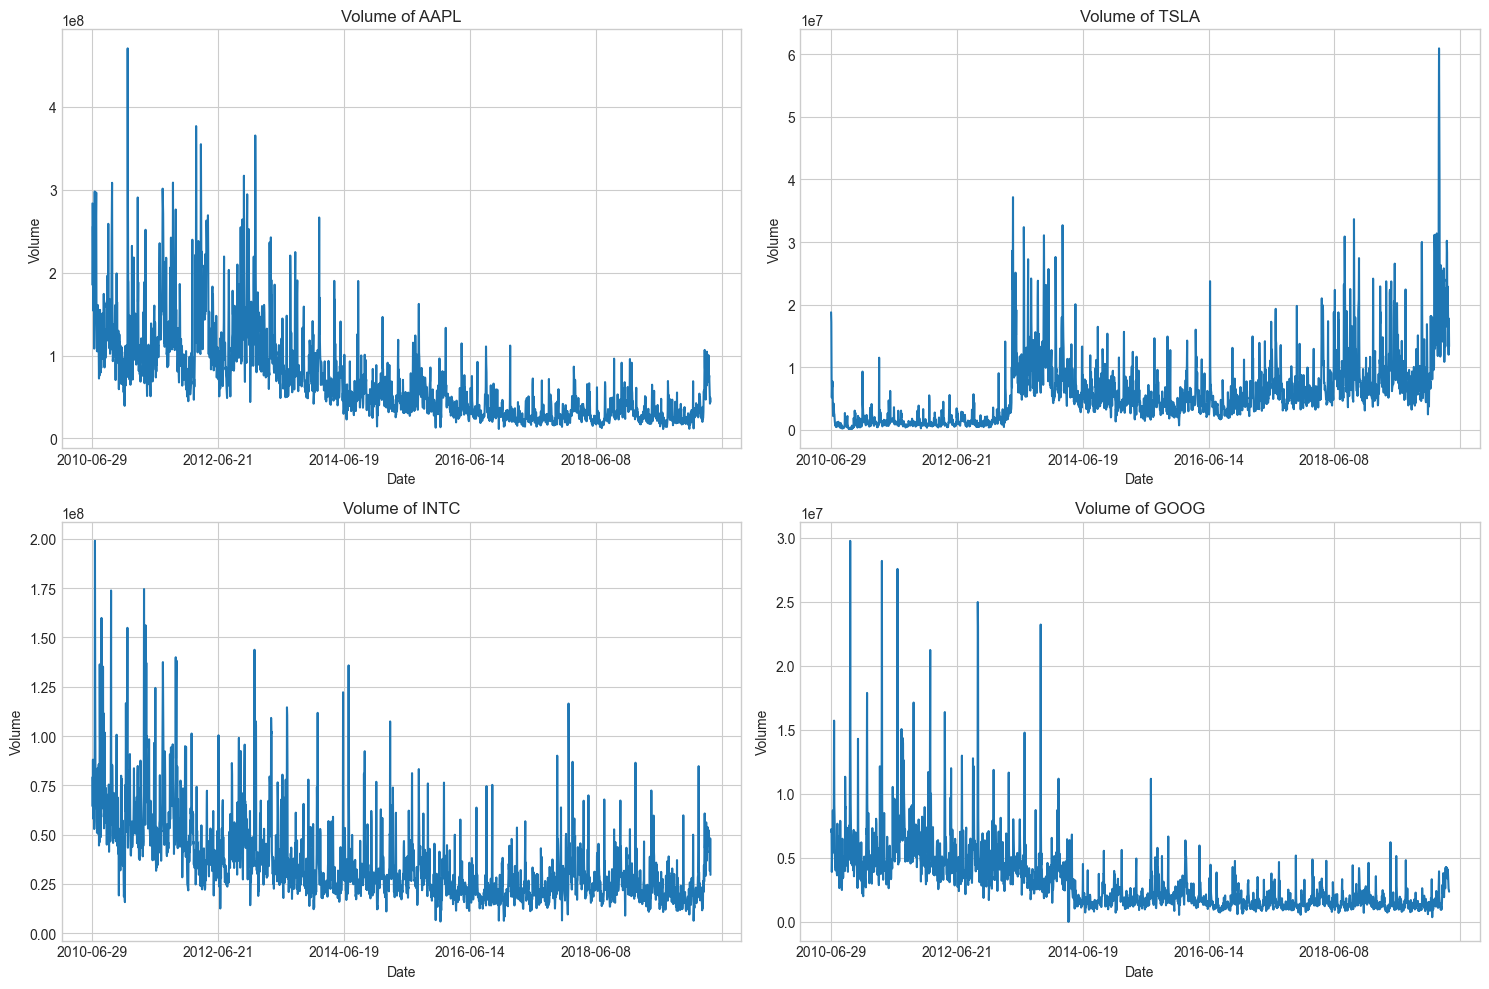

In [5]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15, 10))

for i in range(len(company_list)):
    plt.subplot(2, 2, i+1)
    company_list[i]['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Volume of {company_symbol_list[i]}")

plt.tight_layout() 

When glancing at the data, the companies of Apple, Google and Intel all saw an increased trading volume at the start of the decade which slowly decreased as time progressed while TSLA saw the opposite. This could be explained by Tesla being the newest and also the most relevant company in terms of new advancements in technology. TSLA IPOed in 2010 which is the most recent of any of the companies in this list giving it a large ceiling to grow while the other companies were older and already established with less room to grow.

### Adjusted Closing Price

Closing price refers to the last price that is publicly traded in the market before it closes. Adjusted closing price refers to the closing price after accounting for corporate actions like stock splits and dividends. 

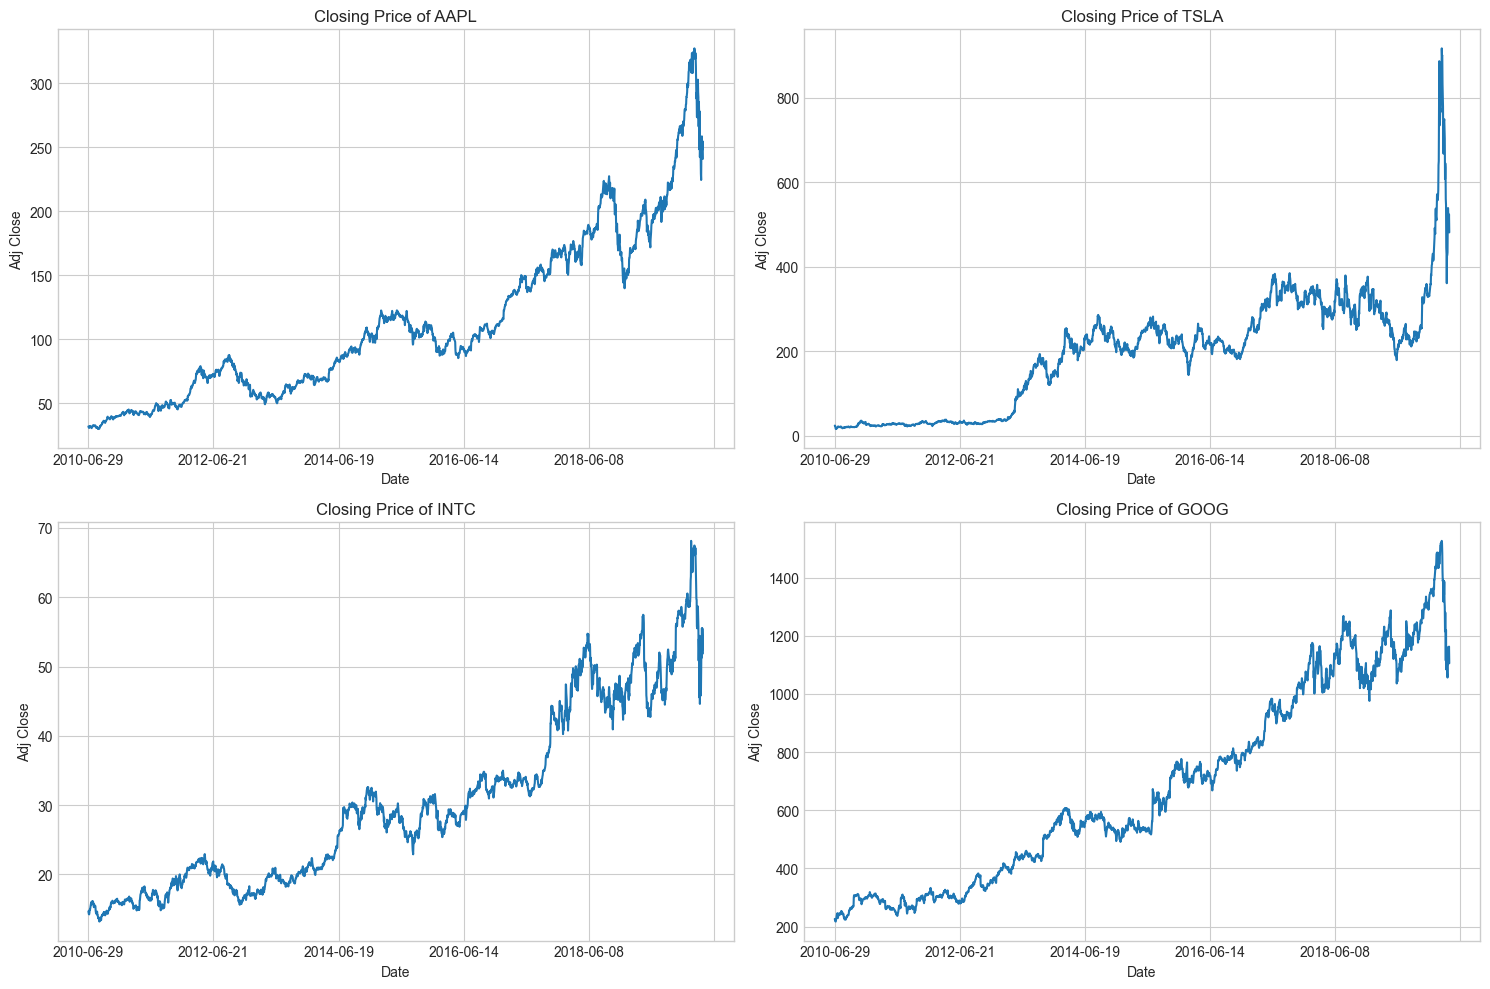

In [6]:
plt.figure(figsize=(15, 10))

for i in range(len(company_list)):
    plt.subplot(2, 2, i+1)
    company_list[i]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {company_symbol_list[i]}")

plt.tight_layout() 

The common trend around closing prices throughout the early 2000s is their consistent rise, partly because of inflation but also because of easier access to investing through the internet and general wealth increase across the world. All of these listed stocks had a solid increase with a decline around late 2019 indicating a bear market that could be used for forecasting. 

### Daily Price Variance

Daily price variance or pct change refers to the gain or loss in adjusted closing price from the previous closing price. 

C:\Users\vmcr2\AppData\Local\Temp\ipykernel_15596\2386435391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_list[i]['Pct Change'] =  company_list[i]['Adj Close'].pct_change()
C:\Users\vmcr2\AppData\Local\Temp\ipykernel_15596\2386435391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_list[i]['Pct Change'] =  company_list[i]['Adj Close'].pct_change()
C:\Users\vmcr2\AppData\Local\Temp\ipykernel_15596\2386435391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

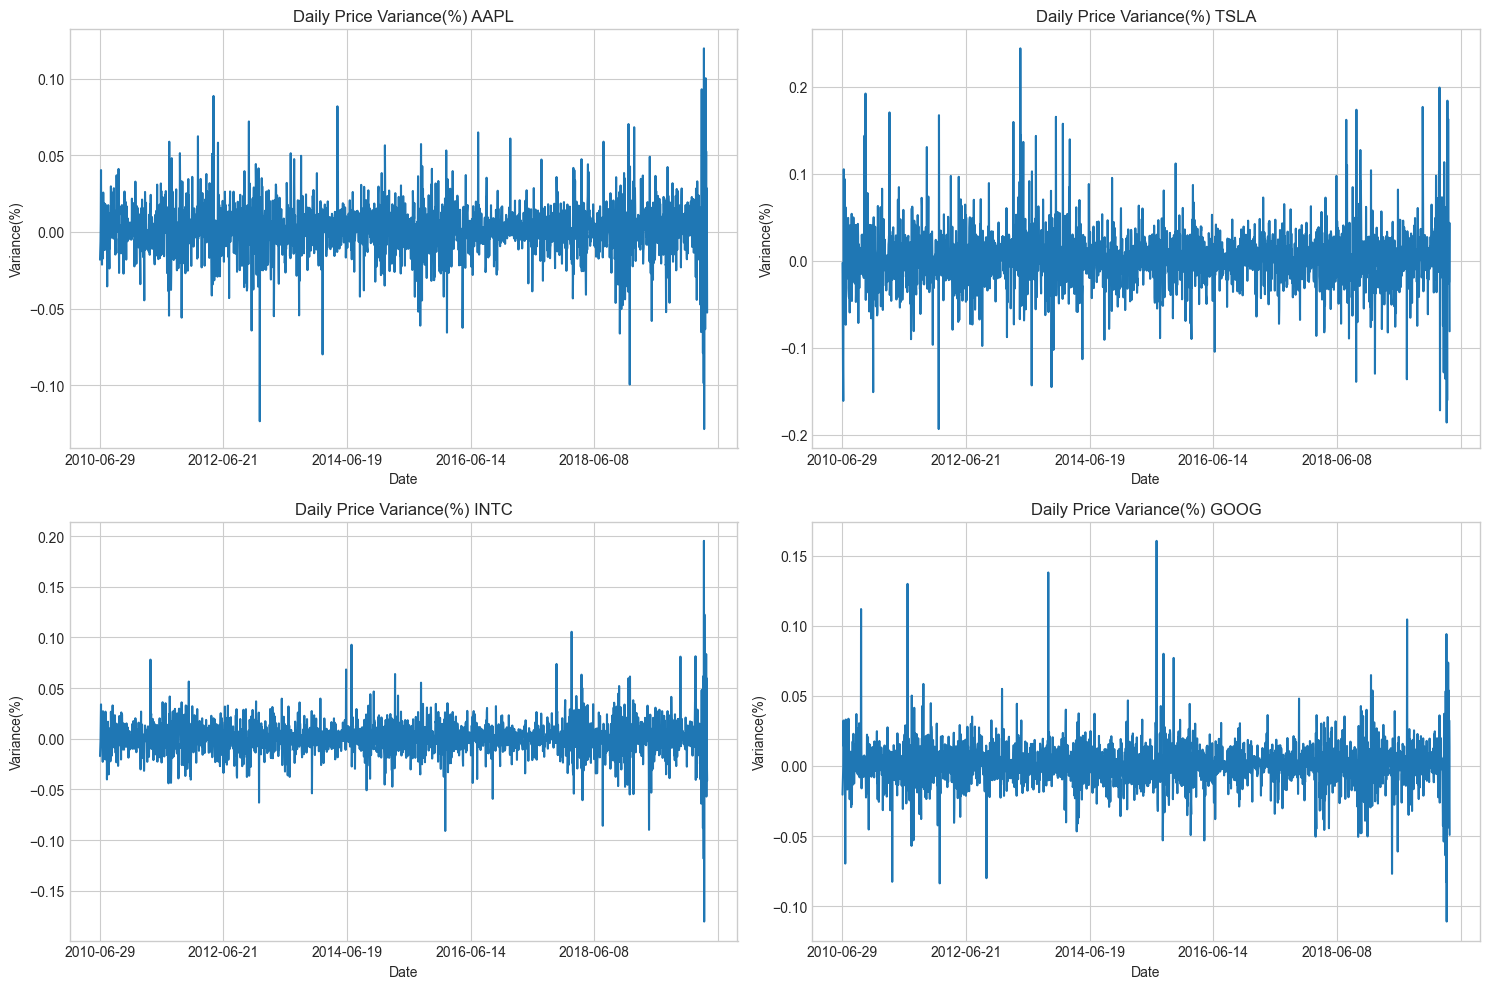

In [7]:
plt.figure(figsize=(15, 10))

for i in range(len(company_list)):
    plt.subplot(2, 2, i+1)
    company_list[i]['Pct Change'] =  company_list[i]['Adj Close'].pct_change()
    company_list[i]['Pct Change'].plot()
    plt.ylabel('Variance(%)')
    plt.title(f"Daily Price Variance(%) {company_symbol_list[i]}")
    
plt.tight_layout() 

The price variance of companies that innovate expeditiously and take large risks like Tesla and Apple are larger day to day than companies like Intel which are consistent and predictable in terms of their rollouts and advancements. 

## Data Correlation

In [8]:
#Storing all Adj Close data 
close_df = pd.DataFrame()

for i in range(len(company_list)):
    df = pd.DataFrame()
    df[company_symbol_list[i]] = company_list[i]['Adj Close']
    if len(close_df) == 0:
        close_df = df
    else:
        close_df = close_df.join(df)

In [9]:
#Storing all price variance data
pct_move_df = close_df.pct_change().dropna()

Text(0.5, 1.0, 'Correlation of Daily Closing Price')

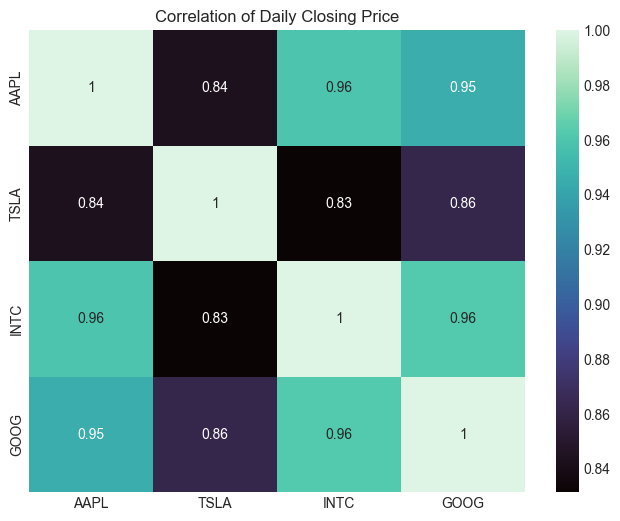

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(close_df.corr(), annot=True, cmap="mako")
plt.title("Correlation of Daily Closing Price")

The prices of all the stocks listed are heavily correlated, the highest being Intel with Apple which makes sense because both companies rely on each other for their products success with intel supplying microchips and Apple creating products using them. All of these companies are also part of the same sector which indicates that if the sector as a whole is doing well, these invidual stocks which take up a large percentage of the stock capitilization are doing well. 

Text(0.5, 1.0, 'Correlation of Daily Close Variance(%)')

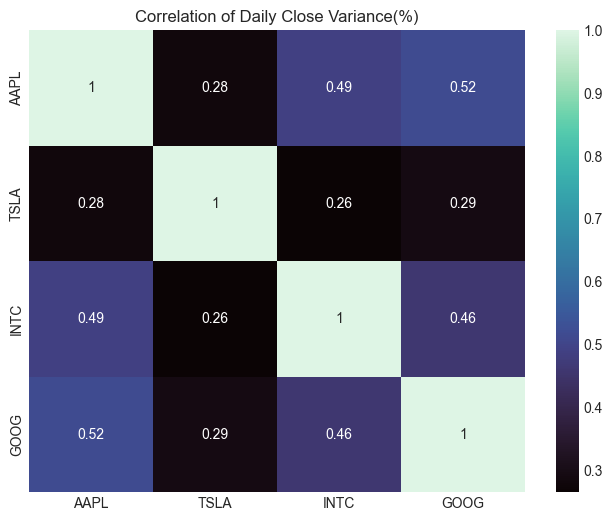

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(pct_move_df.corr(), annot=True, cmap="mako")
plt.title("Correlation of Daily Close Variance(%)")

The percent change daily of each individual stock has more volatility with Tesla being negatively correlated with all other tech stocks. It seems the day to day fluctuations does not rely on other stocks or market as much as the collective feeling of the public about the stock on that specific day. This indicates that it could be better to only include stock data of the stock that needs to be predicted as there is little correlation between the daily price variance between technology stocks. 

<Figure size 1500x1000 with 0 Axes>

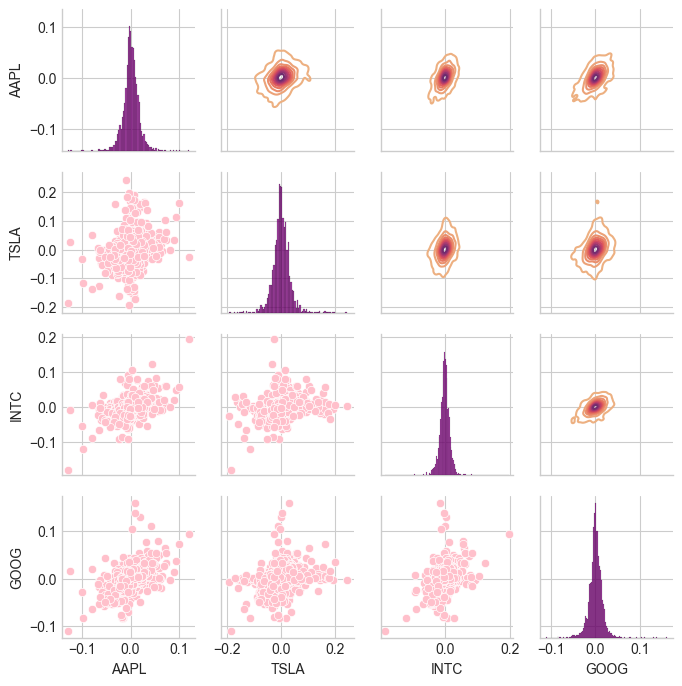

In [12]:
plt.figure(figsize=(15, 10))
g = sns.PairGrid(data=pct_move_df, height=1.75)
g.map_lower(sns.scatterplot, color='pink')
g.map_upper(sns.kdeplot, cmap='flare')
g.map_diag(sns.histplot, color='purple')

In this pairgrid it's visible that the stock's pct move daily follows a uniform distribution when observing the histogram and kdeplots. Daily stock motion is dependant on the mood of investors rather than raw analysis which explains why the stock prices are distributed in that way.

<Figure size 1500x1000 with 0 Axes>

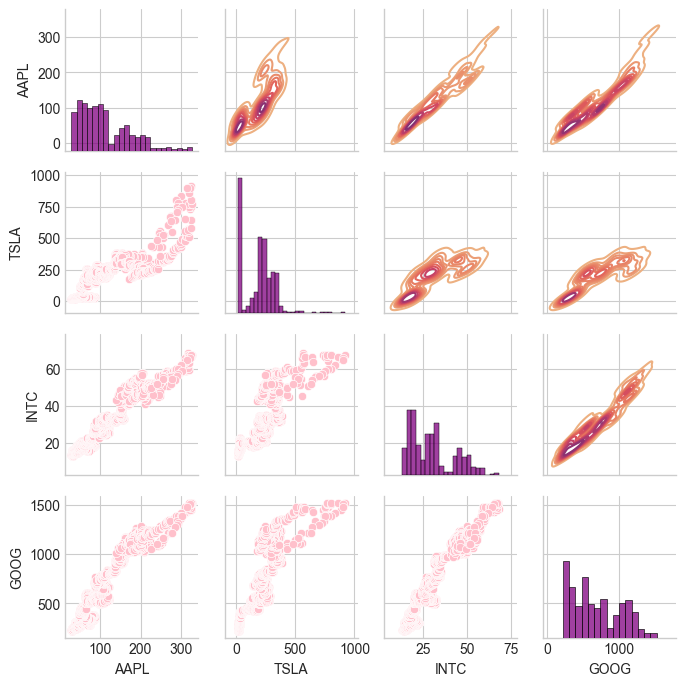

In [14]:
plt.figure(figsize=(15, 10))
g = sns.PairGrid(data=close_df, height=1.75)
g.map_lower(sns.scatterplot, color='pink')
g.map_upper(sns.kdeplot, cmap='flare')
g.map_diag(sns.histplot, color='purple')

Contradictingly, the closing prices of the tech companies do not follow a standard distribution, they are more densely populated at the ends of distribution rather then the centre. There is also a linear correlation between the closing prices of each stock indicating that the final closing prices are intertwined with the general performance of the market

In [15]:
GOOG.set_index('Date', inplace=True)

## Scaling Data

In [39]:
from sklearn.preprocessing import MinMaxScaler

final_df = close_df['GOOG']
values = final_df.values
values = np.reshape(values, (-1,1))

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_arr = scaler.fit_transform(values)

scaled_arr

array([[0.00691962],
       [0.00337802],
       [0.001301  ],
       ...,
       [0.70990535],
       [0.72211649],
       [0.67844225]])

## Processing Training and Testing Data

Seperating training and validation data

In [41]:
X = scaled_arr[0:int(0.9*len(scaled_arr))]
X_val = scaled_arr[int(0.9*len(scaled_arr)):]

The last 75 entries are used to predict the closing price for one index.  

In [42]:
X_train = []
y_train = []

for i in range(75, len(X)):
    X_train.append(X[i-75:i])
    y_train.append(X[i])

In [43]:
X_test = []
y_test = []

for i in range(75, len(X_val)):
    X_test.append(X_val[i-75:i])
    y_test.append(X_val[i])

Converting arrays to numpy arrays

In [44]:
X_train = np.array(X_train)
y_train  = np.array(y_train)

X_test = np.array(X_test)
y_test  = np.array(y_test)

In [45]:
X_train.shape

(2136, 75, 1)

## Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Flatten
from tensorflow.keras.callbacks import TensorBoard

NAME = "seq-2LSTM-DenseLinOutput"
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))

model.add(LSTM(128, return_sequences=False))

model.add(Dense(32))

model.add(Flatten())

model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam')

tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

model.fit(X_train, y_train, batch_size=16, epochs=3, validation_data=(X_test, y_test), callbacks=[tensorboard])

Epoch 1/3
134/134 [==============================] - 36s 232ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 2/3
134/134 [==============================] - 24s 182ms/step - loss: 2.9278e-04 - val_loss: 0.0018
Epoch 3/3
134/134 [==============================] - 25s 183ms/step - loss: 3.4419e-04 - val_loss: 0.0013


In [64]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [65]:
pred = model.predict(X_test)
rmse(y_test, pred)

0.03547410460005328

## Displaying Results

Storing transformed predictions

In [66]:
pred = scaler.inverse_transform(pred)
pred.shape

(171, 1)

In [67]:
test_data = final_df[int(0.9*len(scaled_arr)) + 75:]
test_data = pd.DataFrame(test_data)
test_data.shape

(171, 1)

Storing dataframe of actual and predicted results

In [68]:
comparison = test_data
comparison['Predicted Close'] = pred
comparison.rename(columns={"GOOG": "Real Close"}, inplace=True)
comparison.head()

,Real Close,Predicted Close
Date,,
2019-07-30,1225.140015,1154.359009
2019-07-31,1216.680054,1166.032471
2019-08-01,1209.010010,1176.058960
2019-08-02,1193.989990,1183.749634
2019-08-05,1152.319946,1188.297729


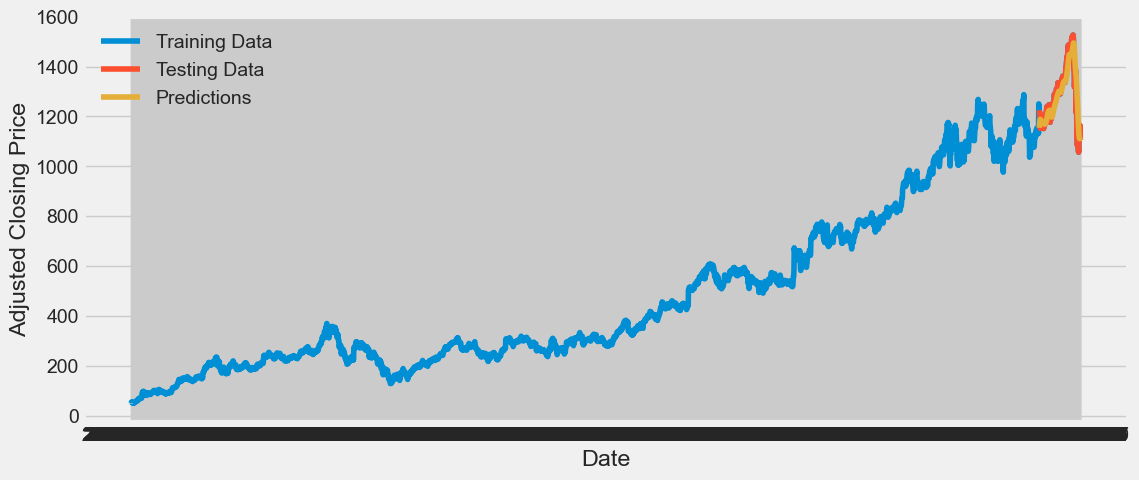

In [69]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 5))
plt.plot(GOOG.filter(['Adj Close']))
plt.plot(comparison['Real Close'])
plt.plot(comparison['Predicted Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(['Training Data', 'Testing Data', 'Predictions'])

## Saving Model

In [71]:
model.save('seq-2LSTM-DenseLinOutput')

INFO:tensorflow:Assets written to: seq-2LSTM-DenseLinOutput\assets


INFO:tensorflow:Assets written to: seq-2LSTM-DenseLinOutput\assets
